[Data Source](https://www.kaggle.com/benroshan/factors-affecting-campus-placement/data)


# Questions
* Which factor influenced a candidate in getting placed?
* Does percentage matters for one to get placed?
* Which degree specialization is much demanded by corporate?
* Play with the data conducting all statistical tests.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
import pandas_profiling
%matplotlib inline
mp.style.use('fivethirtyeight')

In [61]:
rec = pd.read_csv('datasets_596958_1073629_Placement_Data_Full_Class.csv')
rec.drop('sl_no', axis=1, inplace=True)
rec.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [3]:
rec.profile_report(title='Recruitment Report', progress_bar=True)

* 67 missing values in **Salary** column.
* Also the **Salary** column has some outliers.
* Range of the data is different. Needs to be scaled.

In [4]:
rec.describe().T

count           mean           std        min         25%       50%  \
ssc_p     215.0      67.303395     10.827205      40.89      60.600      67.0   
hsc_p     215.0      66.333163     10.897509      37.00      60.900      65.0   
degree_p  215.0      66.370186      7.358743      50.00      61.000      66.0   
etest_p   215.0      72.100558     13.275956      50.00      60.000      71.0   
mba_p     215.0      62.278186      5.833385      51.21      57.945      62.0   
salary    148.0  288655.405405  93457.452420  200000.00  240000.000  265000.0   

                 75%        max  
ssc_p         75.700      89.40  
hsc_p         73.000      97.70  
degree_p      72.000      91.00  
etest_p       83.500      98.00  
mba_p         66.255      77.89  
salary    300000.000  940000.00

In [31]:
display(rec.isna().sum())
display(rec.describe().T)

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
status_encoded     0
dtype: int64

count           mean           std        min         25%  \
sl_no           215.0     108.000000     62.209324       1.00      54.500   
ssc_p           215.0      67.303395     10.827205      40.89      60.600   
hsc_p           215.0      66.333163     10.897509      37.00      60.900   
degree_p        215.0      66.370186      7.358743      50.00      61.000   
etest_p         215.0      72.100558     13.275956      50.00      60.000   
mba_p           215.0      62.278186      5.833385      51.21      57.945   
salary          148.0  288655.405405  93457.452420  200000.00  240000.000   
status_encoded  215.0       0.688372      0.464240       0.00       0.000   

                     50%         75%        max  
sl_no              108.0     161.500     215.00  
ssc_p               67.0      75.700      89.40  
hsc_p               65.0      73.000      97.70  
degree_p            66.0      72.000      91.00  
etest_p             71.0      83.500      98.00  
mba_p               62.0      66.255      77.89  
salary          265000.0  300000.000  940000.00  
status_encoded       1.0       1.000       1.00

In [22]:
rec.groupby('status').mean()

sl_no      ssc_p      hsc_p   degree_p    etest_p      mba_p  \
status                                                                          
Not Placed  110.477612  57.544030  58.395522  61.134179  69.587910  61.612836   
Placed      106.878378  71.721486  69.926554  68.740541  73.238041  62.579392   

                   salary  
status                     
Not Placed            NaN  
Placed      288655.405405

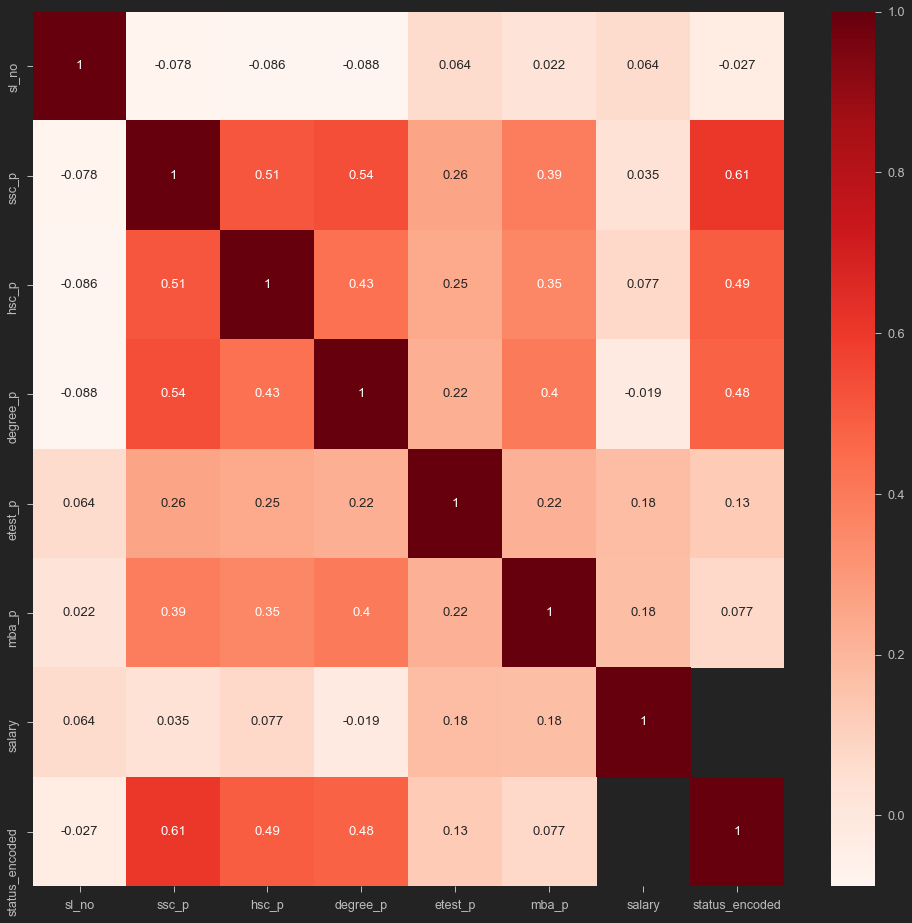

In [18]:
corr = rec.corr()
mp.figure(figsize = (15, 15))
_ = sns.heatmap(corr, annot=True, cmap='Reds')

In [32]:
rec.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  \
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0   
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0   
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0   
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN   
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0   

   status_encoded  
0               1  
1               1  
2               1  
3               0  
4               1

In [28]:
display(rec.groupby(['status_encoded', 'specialisation']).sum()[['sl_no']])
display(rec.groupby(['status_encoded', 'degree_t']).sum()[['sl_no']])
display(rec.groupby(['status_encoded', 'workex']).sum()[['sl_no']])
display(rec.groupby(['status_encoded', 'hsc_s']).sum()[['sl_no']])

sl_no
status_encoded specialisation       
0              Mkt&Fin          2813
               Mkt&HR           4589
1              Mkt&Fin          9838
               Mkt&HR           5980

sl_no
status_encoded degree_t        
0              Comm&Mgmt   4823
               Others       598
               Sci&Tech    1981
1              Comm&Mgmt  10587
               Others       786
               Sci&Tech    4445

sl_no
status_encoded workex       
0              No       6291
               Yes      1111
1              No       8562
               Yes      7256

sl_no
status_encoded hsc_s          
0              Arts        665
               Commerce   3537
               Science    3200
1              Arts        566
               Commerce   8504
               Science    6748

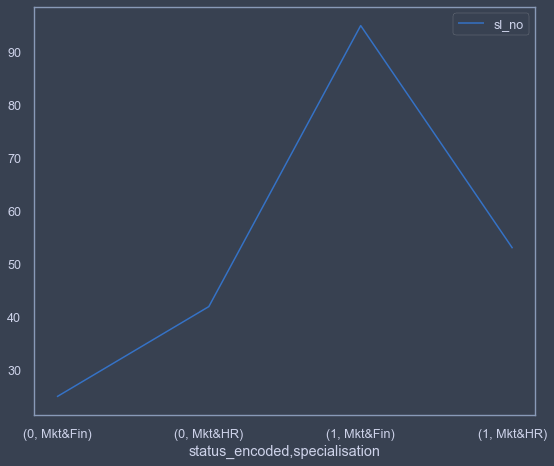

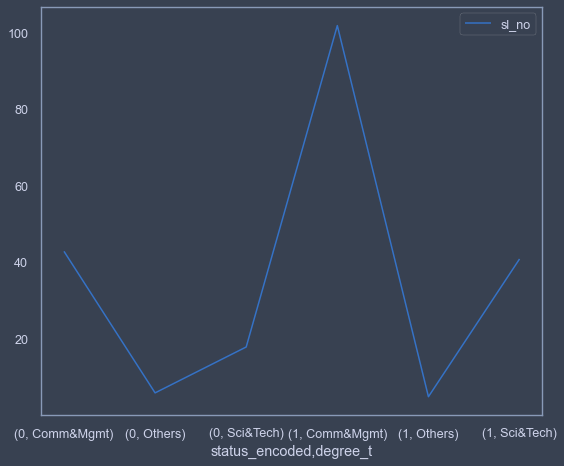

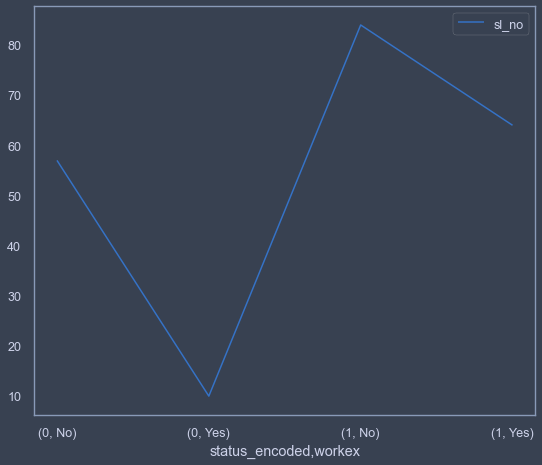

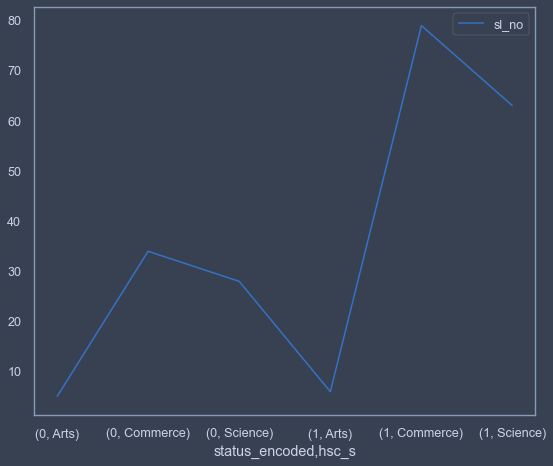

In [12]:
rec.groupby(['status_encoded', 'specialisation']).count()[['sl_no']].plot()
rec.groupby(['status_encoded', 'degree_t']).count()[['sl_no']].plot()
rec.groupby(['status_encoded', 'workex']).count()[['sl_no']].plot()
rec.groupby(['status_encoded', 'hsc_s']).count()[['sl_no']].plot()

The field of Commerce seems to have more chances of being placed.
The next comes Science.

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
rec['status_encoded'] = le.fit_transform(rec['status'])
rec.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  \
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0   
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0   
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0   
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN   
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0   

   status_encoded  
0               1  
1               1  
2               1  
3               0  
4               1

## Working with feature Gender

In [33]:
rec.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  \
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0   
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0   
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0   
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN   
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0   

   status_encoded  
0               1  
1               1  
2               1  
3               0  
4               1

In [34]:
rec['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

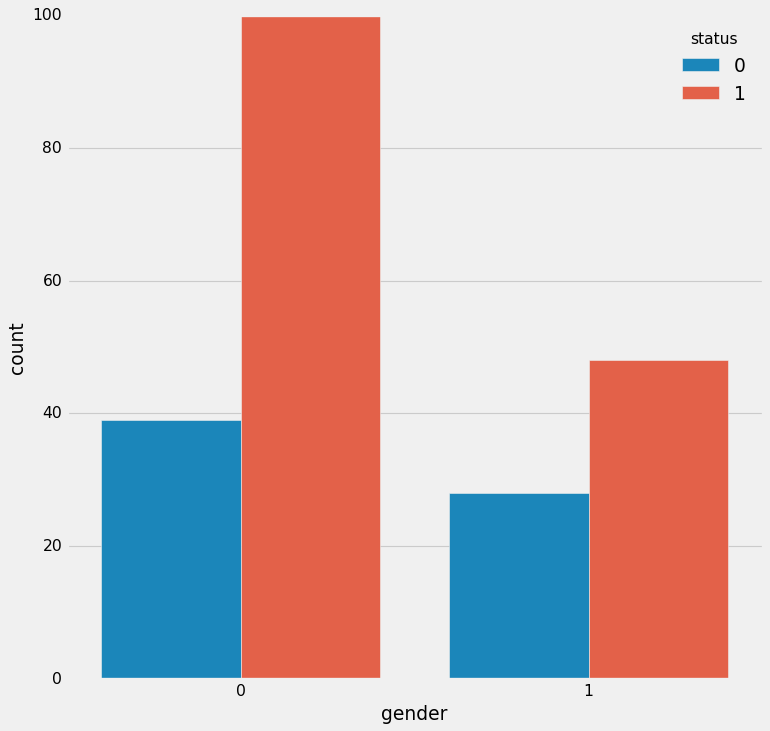

In [50]:
mp.figure(figsize=(10, 10))
_ = sns.countplot('gender', hue='status', data=rec)

In [60]:
rec.head()

gender  ssc_p  hsc_p  hsc_s  degree_p  degree_t  workex  etest_p  \
0       0  67.00  91.00      0     58.00         1       0     55.0   
1       0  79.33  78.33      1     77.48         1       1     86.5   
2       0  65.00  68.00      2     64.00         0       0     75.0   
3       0  56.00  52.00      1     52.00         1       0     66.0   
4       0  85.80  73.60      0     73.30         0       0     96.8   

   specialisation  mba_p  status    salary  
0               0  58.80       1  270000.0  
1               1  66.28       1  200000.0  
2               1  57.80       1  250000.0  
3               0  59.43       0       NaN  
4               1  55.50       1  425000.0

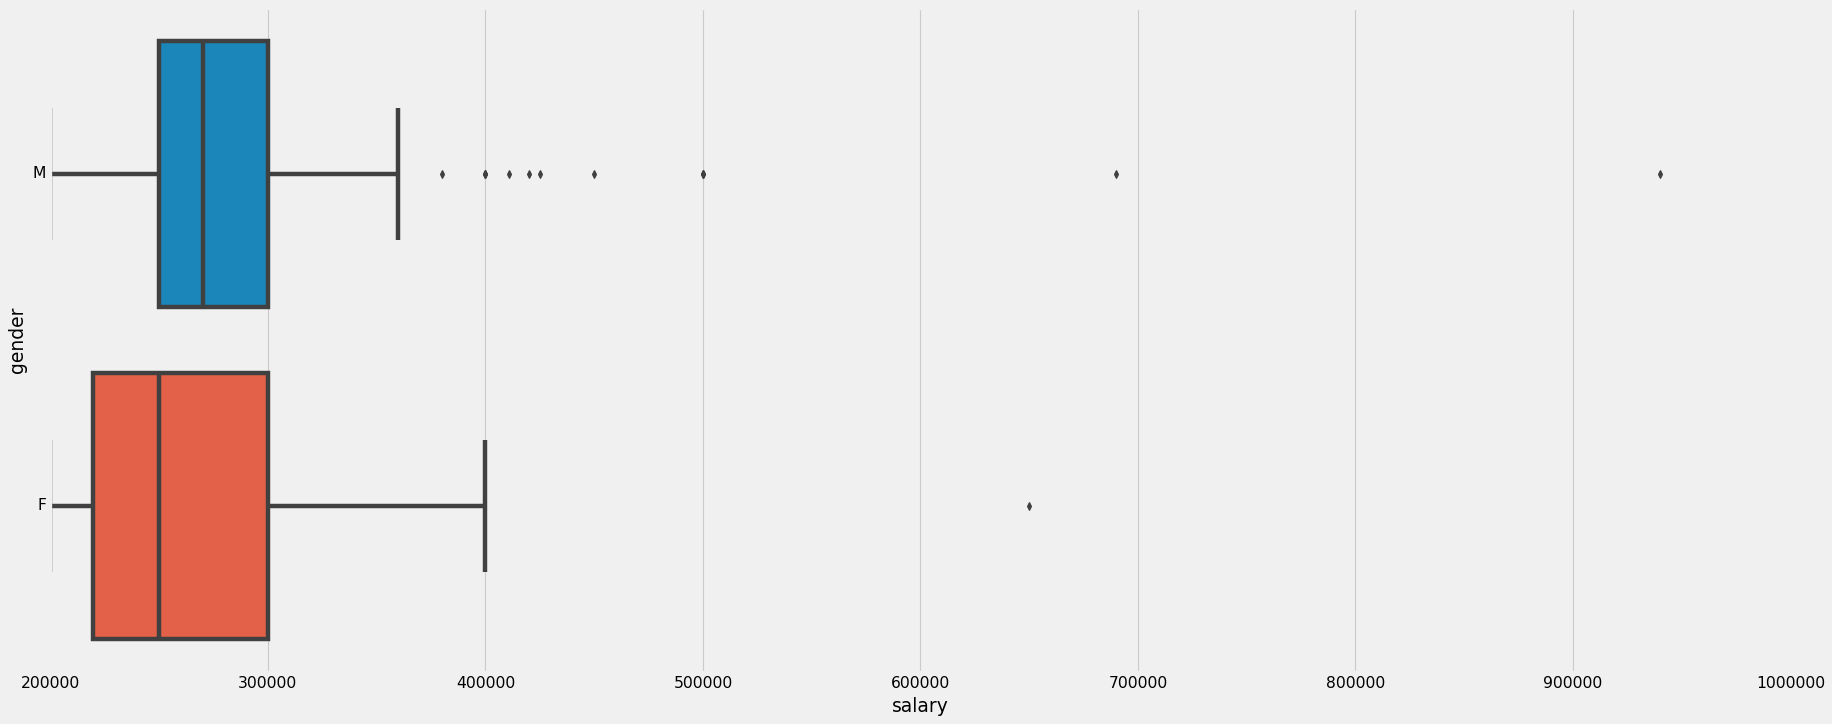

In [62]:
mp.figure(figsize=(25, 10))
_ = sns.boxplot('salary', 'gender', data=rec)

* Male &rarr; 139 & Female &rarr; 76
* The placements seems to be biased in favour of Male gender.
* Men seem to be offered higher salary placements. They create outliers in the data.
* They are getting hihger CTC jobs than Females on average.

## Working with feature ssc_b [Secondary Education Board]

In [16]:
rec.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4     No     96.8        Mkt&Fin  55.50      Placed  425000.0

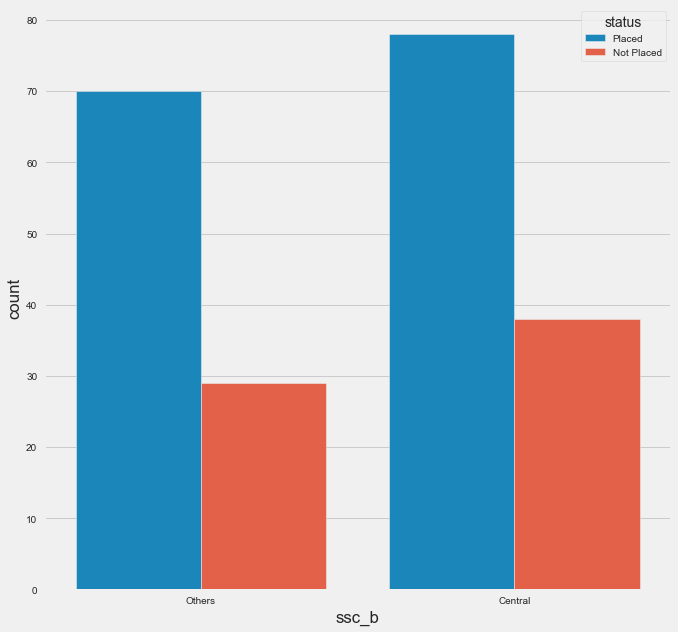

In [17]:
mp.figure(figsize=(10, 10))
_ = sns.countplot('ssc_b', hue='status', data=rec)

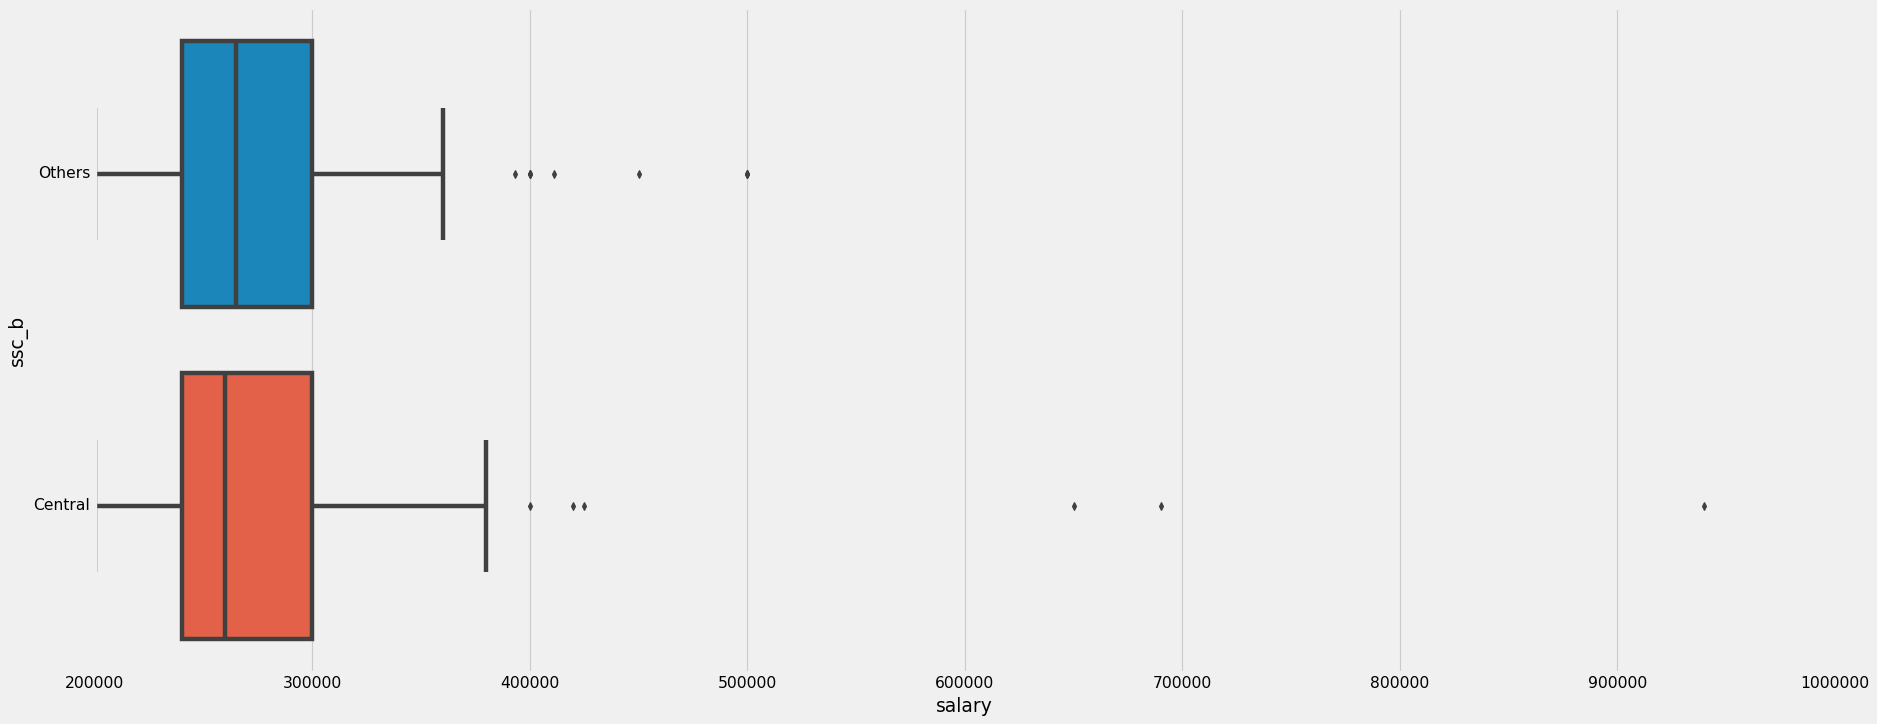

In [63]:
mp.figure(figsize=(25, 10))
_ = sns.boxplot('salary', 'ssc_b', data=rec)

* Students from both the boards seem to get almost same amount of placements.
* There are outliers in both the boards. But students from Central board students get higher salary.
* Conclusion ssc_b [Secondary Education Board] is not affecting the salary and status.

## Working with feature ssc_p [Secondary Education Percentage]

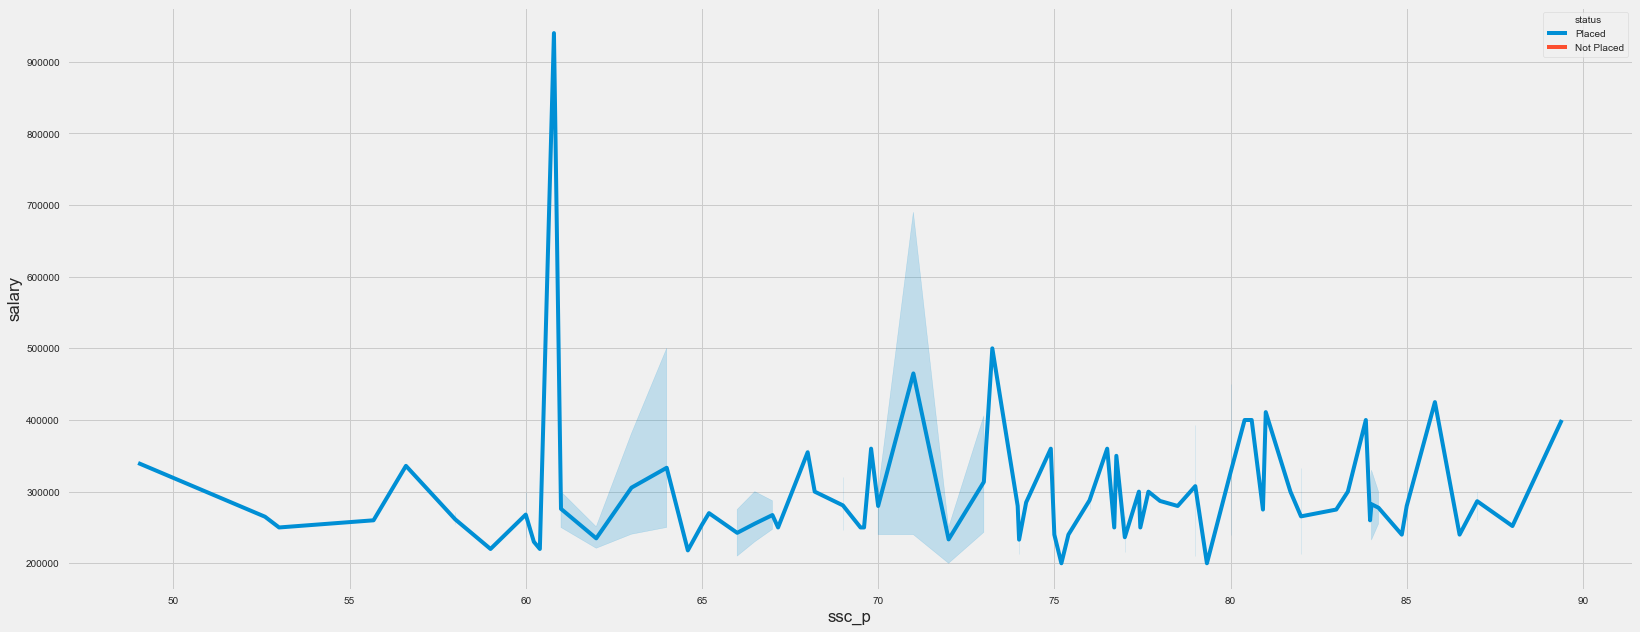

In [24]:
mp.figure(figsize=(25, 10))
_ = sns.lineplot('ssc_p', 'salary', hue='status', data=rec)

The plot ignores any Nan values and since anyone who didn't get placed will have a Nan value in the salary column this plot will not take them into the process of graph formation.

And thus there is only one line in the plot which refers to the students who got placed.

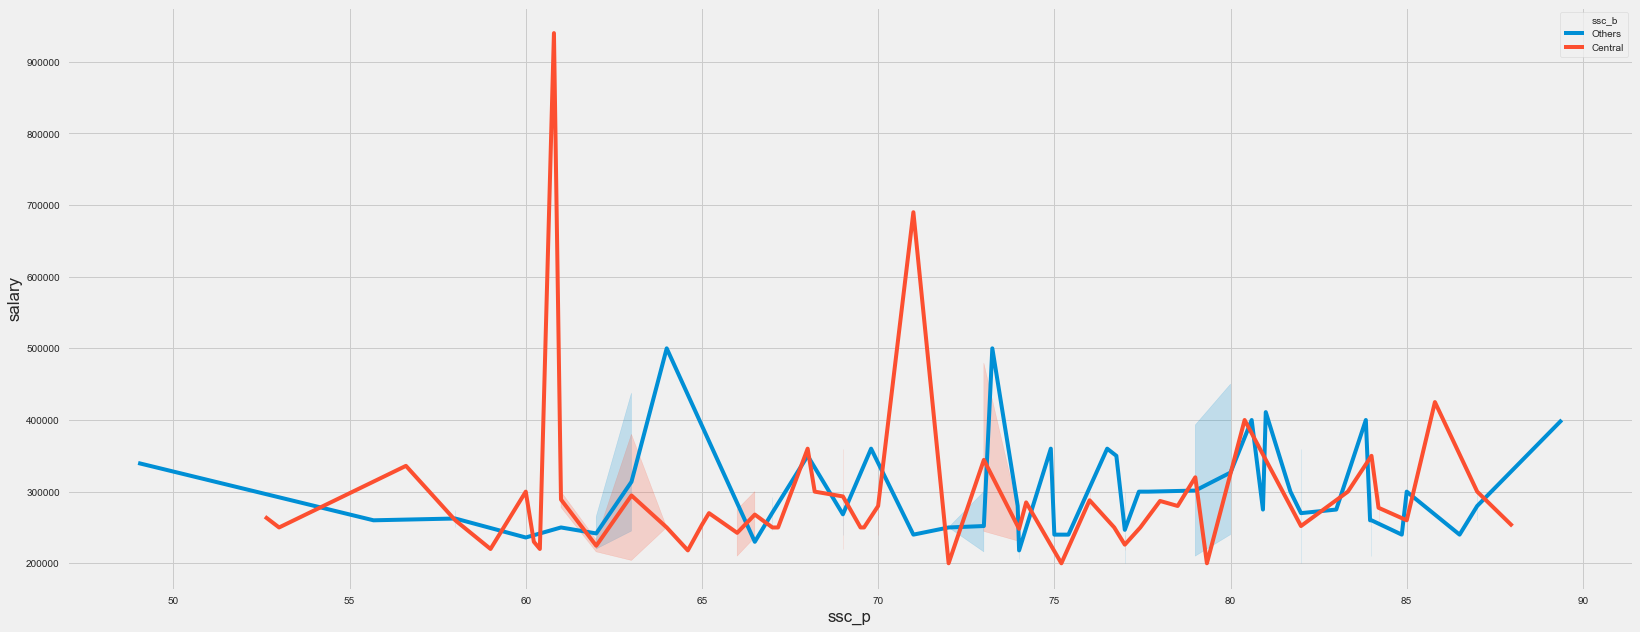

In [26]:
mp.figure(figsize=(25, 10))
_ = sns.lineplot('ssc_p', 'salary', hue='ssc_b', data=rec)

There seems to be no correlation between the data of salary and ssc percentage. Thus ssc percentage is not affecting the salary.

Board is not affecting the salary as mentioned earlier.

## Working with feature hsc_b [Higher Secondary Education Board]

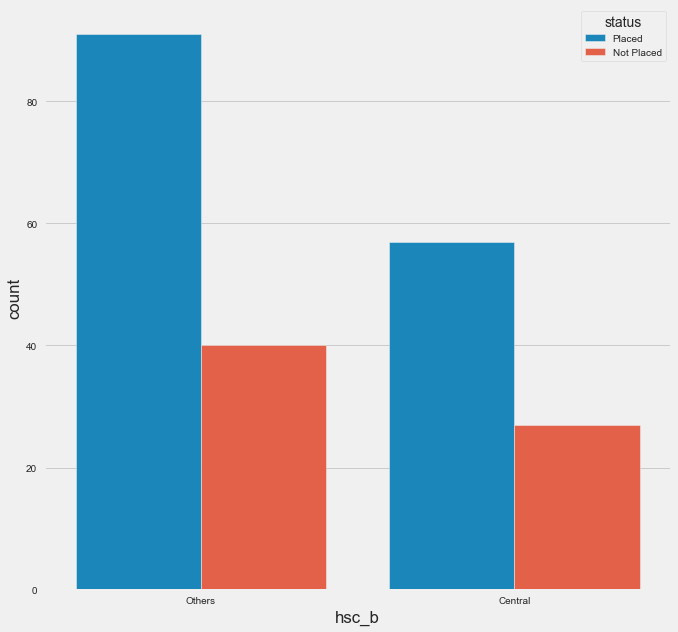

In [28]:
mp.figure(figsize=(10, 10))
_ = sns.countplot('hsc_b', hue = 'status', data=rec)

* The **Others** value in the board has more placements as compared to the Central board.
* But that may consists of multiple boards and thus we can conclude that the HSC Board does not affect the placement.

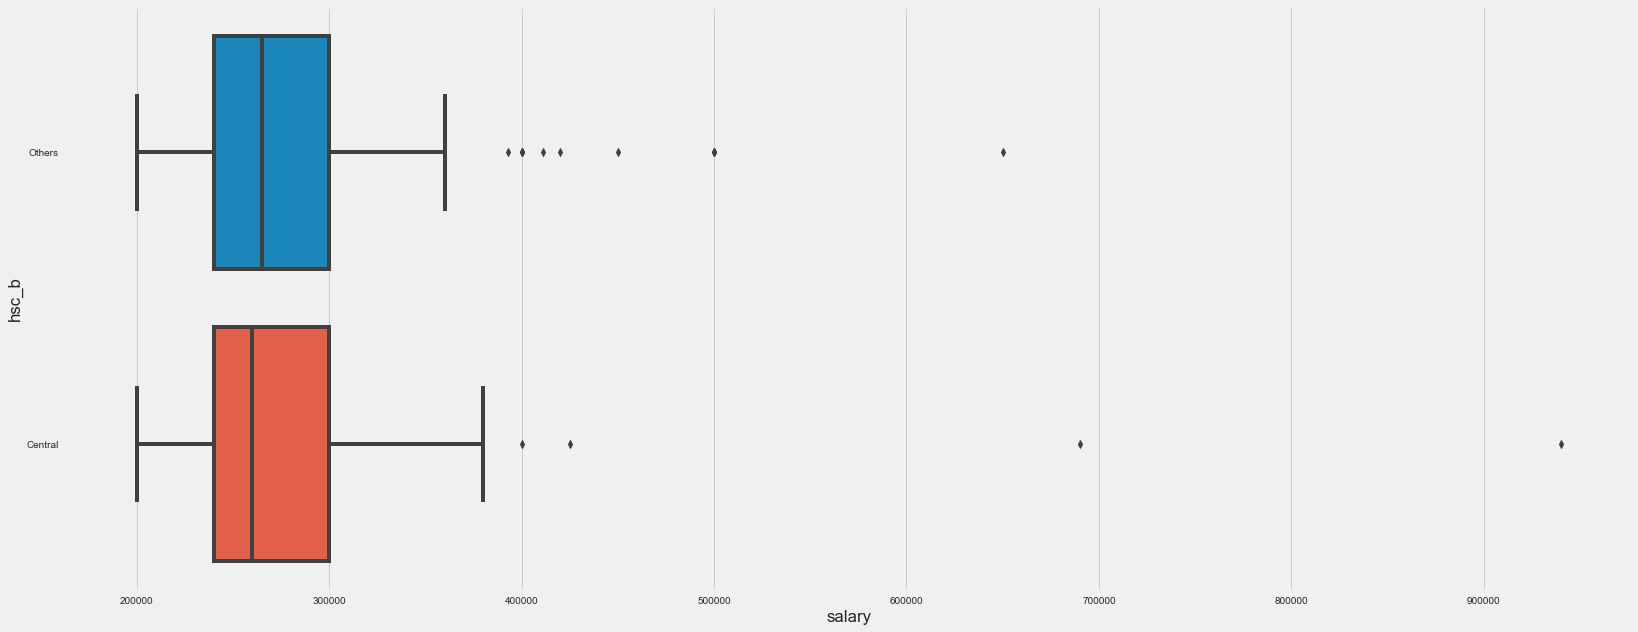

In [32]:
mp.figure(figsize=(25, 10))
_ = sns.boxplot('salary', 'hsc_b', data=rec)

* Same insights can be gained form this plot as well.
* The Central board students get higher salary but there are outliers on both the sides.

## Working with feature hsc_p [Higher Secondary Education Percentage]

In [5]:
rec.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4     No     96.8        Mkt&Fin  55.50      Placed  425000.0

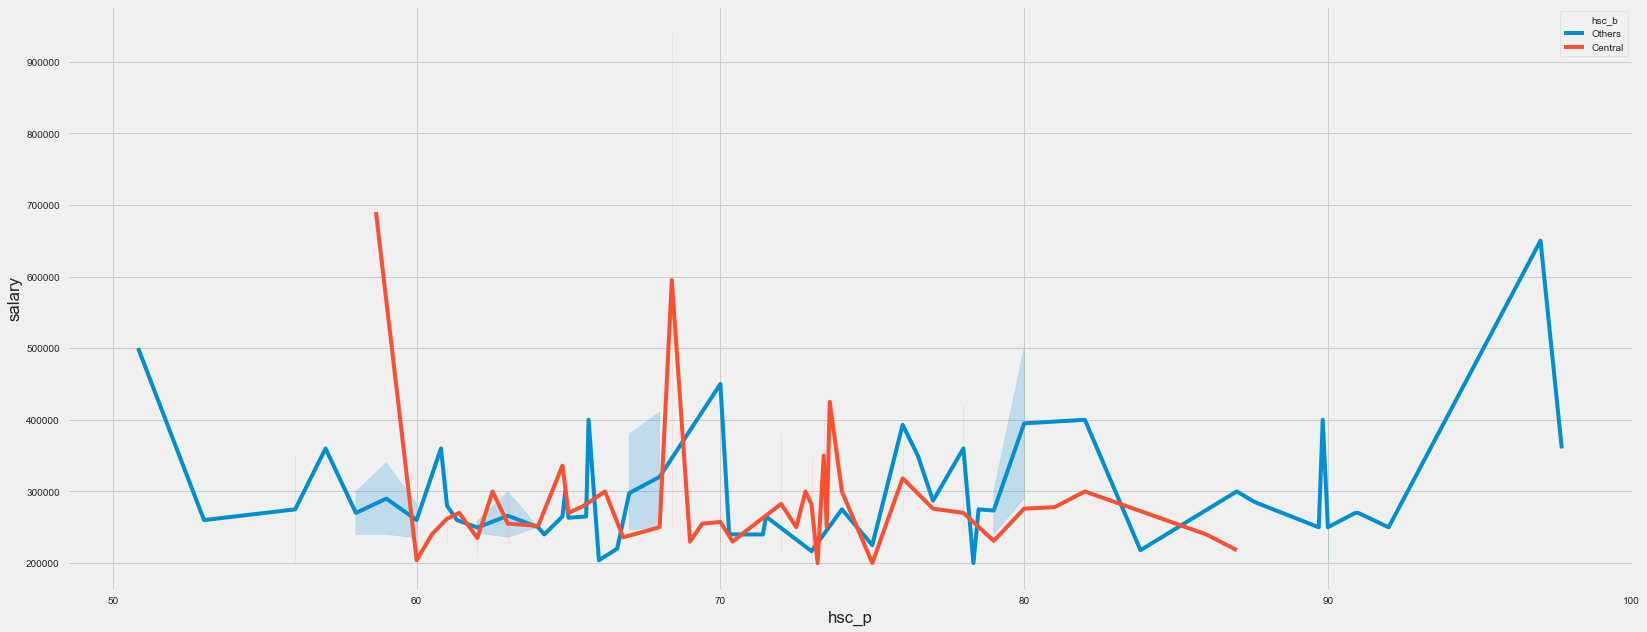

In [8]:
mp.figure(figsize=(25, 10))
_ = sns.lineplot('hsc_p', 'salary', hue='hsc_b', data=rec)

* The same conclusion can be drawn from this chart. 
* The hsc_p doesnt affect the salary.

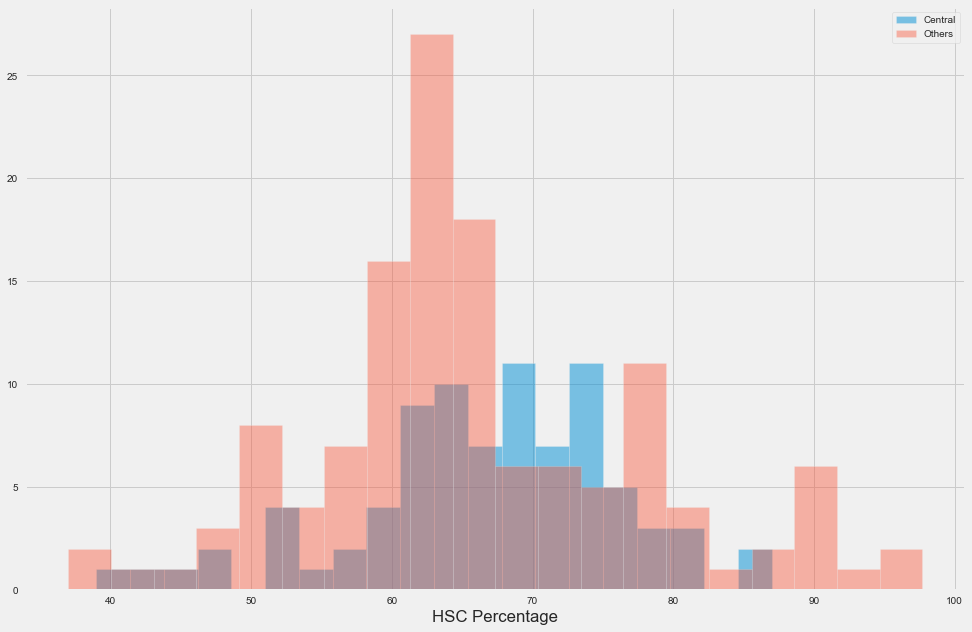

In [27]:
mp.figure(figsize=(15 ,10))
_ = mp.hist(rec['hsc_p'][rec['hsc_b'] == 'Central'], alpha=0.5, label='Central', bins=20)
_ = mp.hist(rec['hsc_p'][rec['hsc_b'] == 'Others'], alpha=0.4, label='Others', bins=20)
mp.xlabel('HSC Percentage')
_ = mp.legend(loc='upper right')

In [ ]:
mp.figure(figsize=(15 ,10))
_ = mp.hist(rec['hsc_p'][rec['hsc_b'] == 'Central'], alpha=0.5, label='Central')
_ =mp.hist(rec['hsc_p'][rec['hsc_b'] == 'Others'], alpha=0.5, label='Others')
mp.xlabel('HSC Percentage')
mp.legend(loc='upper right')

## Working with feature hsc_s [Higher Secondary Education Specialization] 

In [28]:
rec.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4     No     96.8        Mkt&Fin  55.50      Placed  425000.0

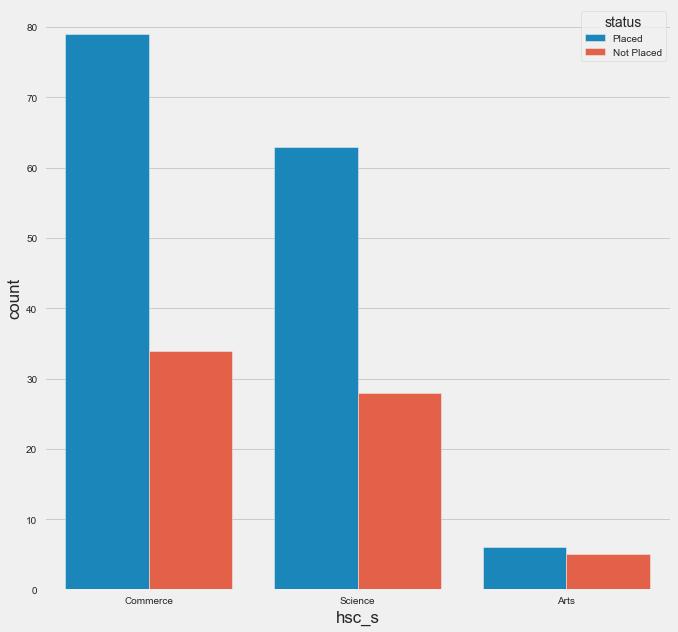

In [29]:
mp.figure(figsize=(10, 10))
_ = sns.countplot('hsc_s', hue='status', data=rec)

* The number of candidates from Arts spl are very low

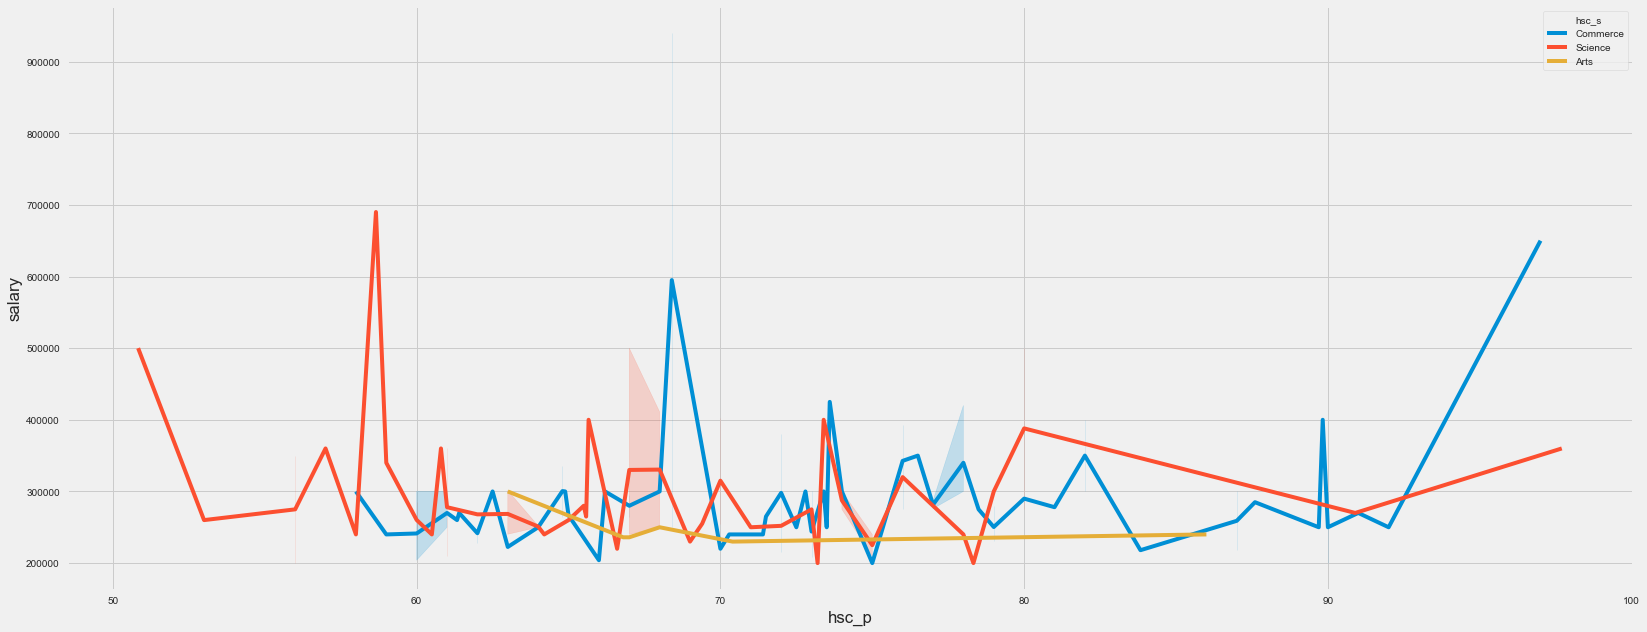

In [30]:
mp.figure(figsize=(25, 10))
_ = sns.lineplot('hsc_p', 'salary', hue='hsc_s', data=rec)

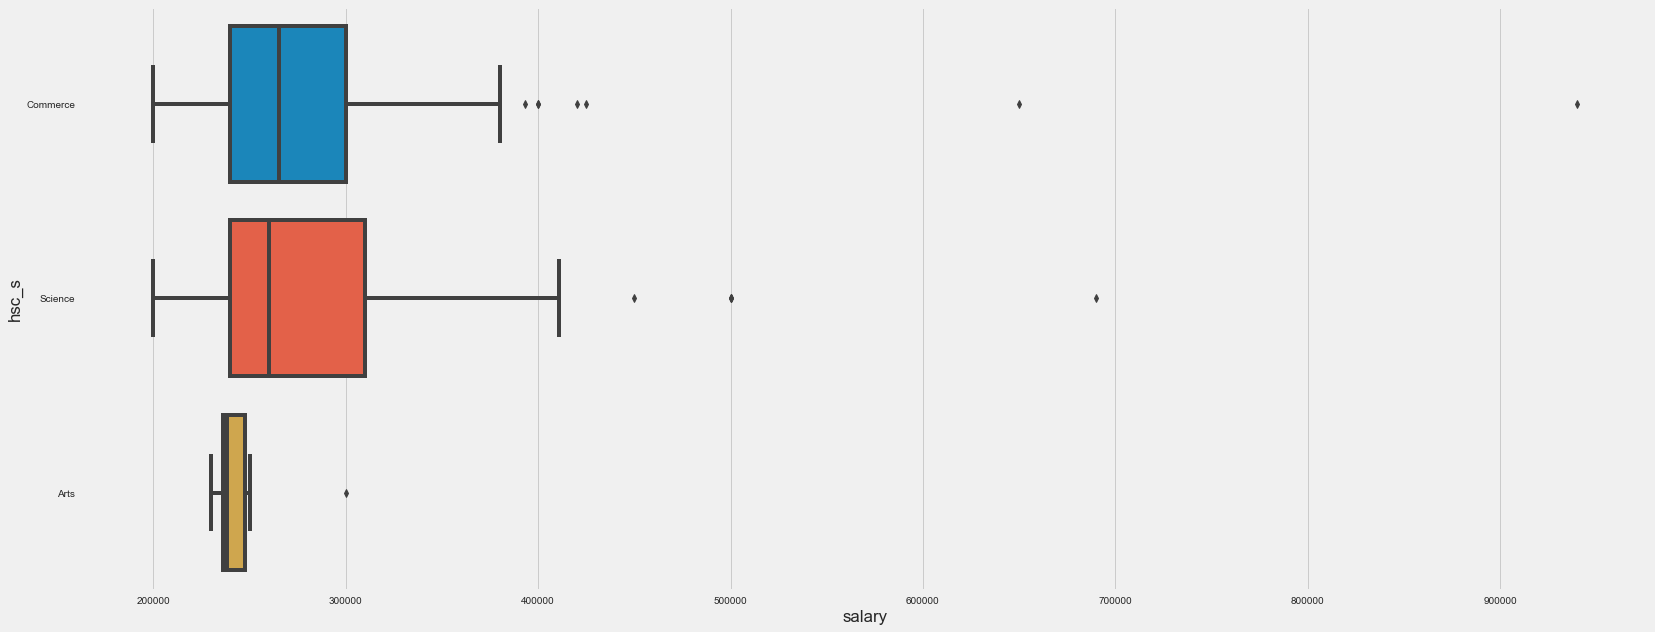

In [31]:
mp.figure(figsize=(25, 10))
_ = sns.boxplot('salary', 'hsc_s', data=rec)

* The students of Arts get less salary as compared to students of other specializations of Commerce and Science on an average.
* There are outliers on both the Science and Commerce parts and the Commerce students seem to get higher salary.

## Working with features degree_t and degree_p

In [32]:
rec.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4     No     96.8        Mkt&Fin  55.50      Placed  425000.0

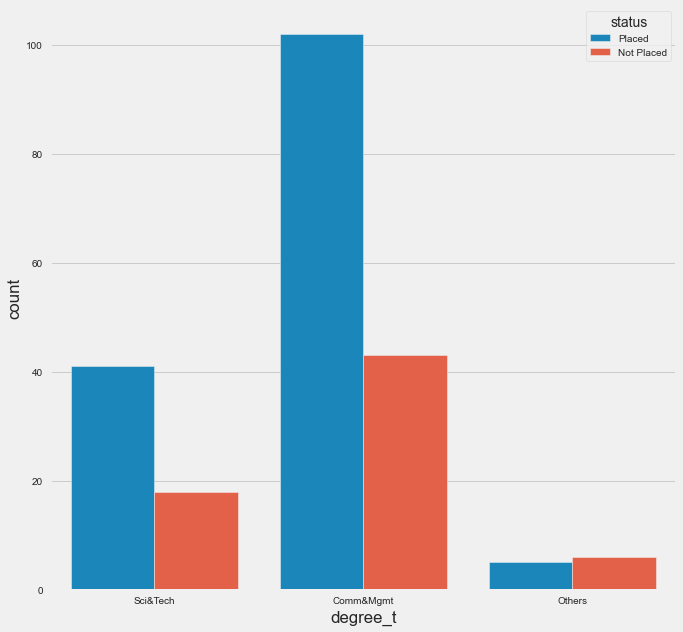

In [40]:
mp.figure(figsize=(10, 10))
_ = sns.countplot('degree_t', hue='status', data=rec)

* There are more students of Comm&Mgmt than any other degree course.
* They have received more placements than any other degree course.
* The count Others is very low.
* It can be concluded that the degree course is affecting the status of placement.

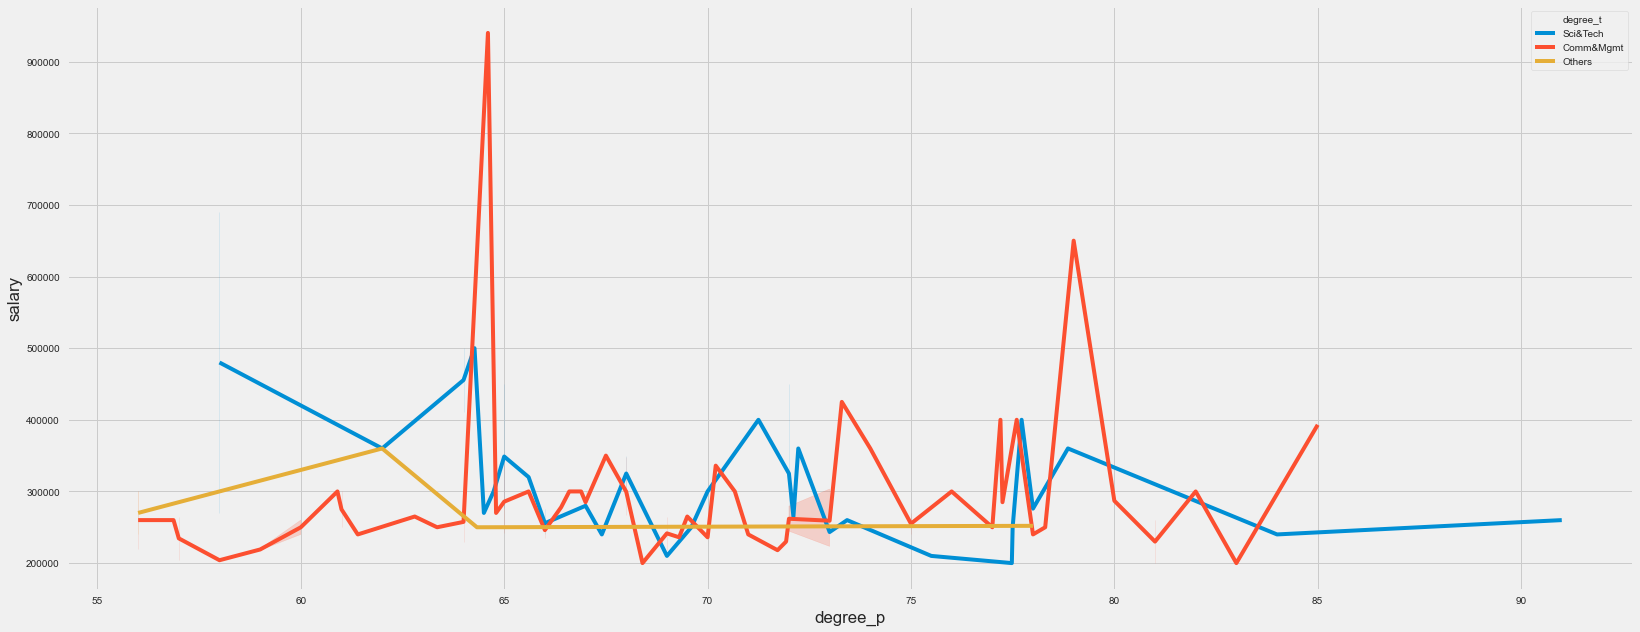

In [37]:
mp.figure(figsize=(25, 10))
_ = sns.lineplot('degree_p', 'salary', hue= 'degree_t', data=rec)

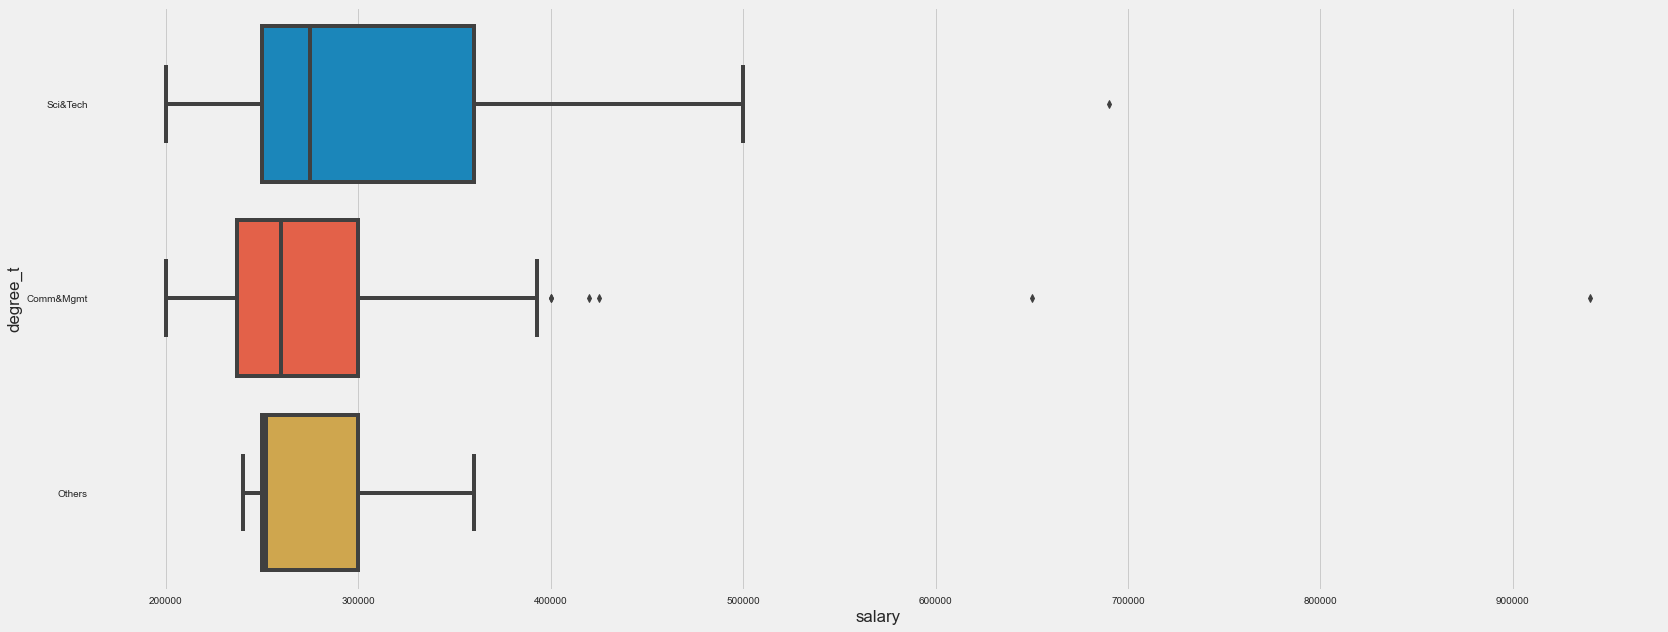

In [42]:
mp.figure(figsize=(25, 10))
_ = sns.boxplot('salary', 'degree_t', data=rec)

* There are outliers on both the Sci&Tech and Comm&Mgmt but Comm&Mgmt received higher salary offers.
* Students of Others course receive lower salary on average as compared to other courses.

## Working with features workex

In [3]:
rec.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4     No     96.8        Mkt&Fin  55.50      Placed  425000.0

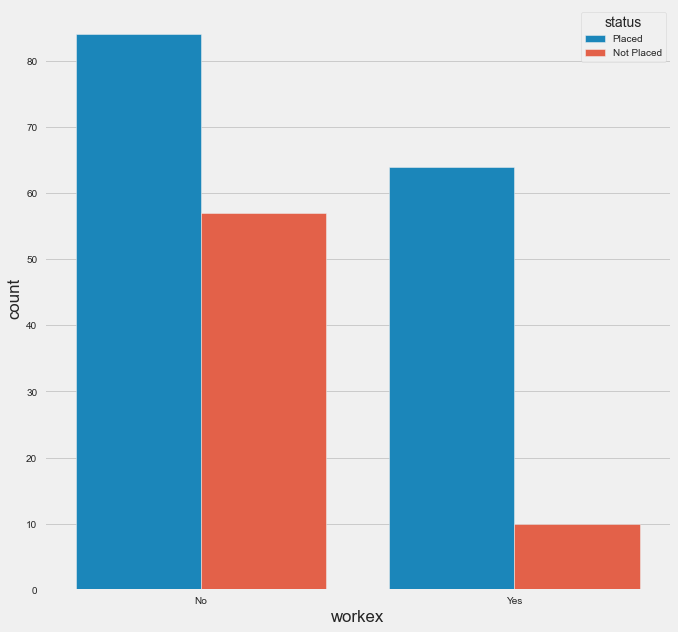

In [4]:
mp.figure(figsize=(10, 10))
_ = sns.countplot('workex', hue='status', data=rec)

The workex has an affect on the status.

Most of the students having no workex did not get placed.

Though the students who got placed had more number of students with no workex.

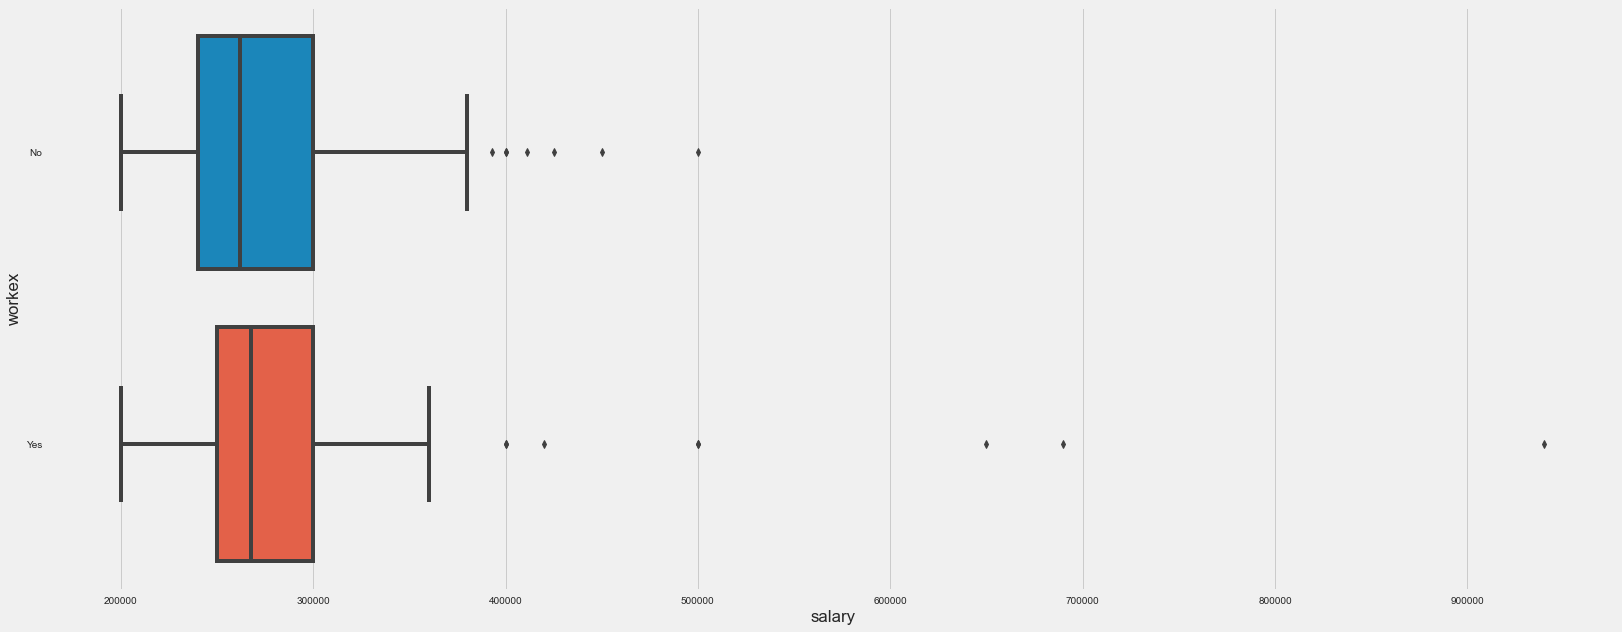

In [6]:
mp.figure(figsize=(25, 10))
_ = sns.boxplot('salary', 'workex', data=rec)

There are outlier on both the sides.

It is clear that students with workex were offered more salary as compared to the ones without workex.

## Working with the feature etest_p [Employability Test Percentage ( conducted by college)]

In [7]:
rec.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4     No     96.8        Mkt&Fin  55.50      Placed  425000.0

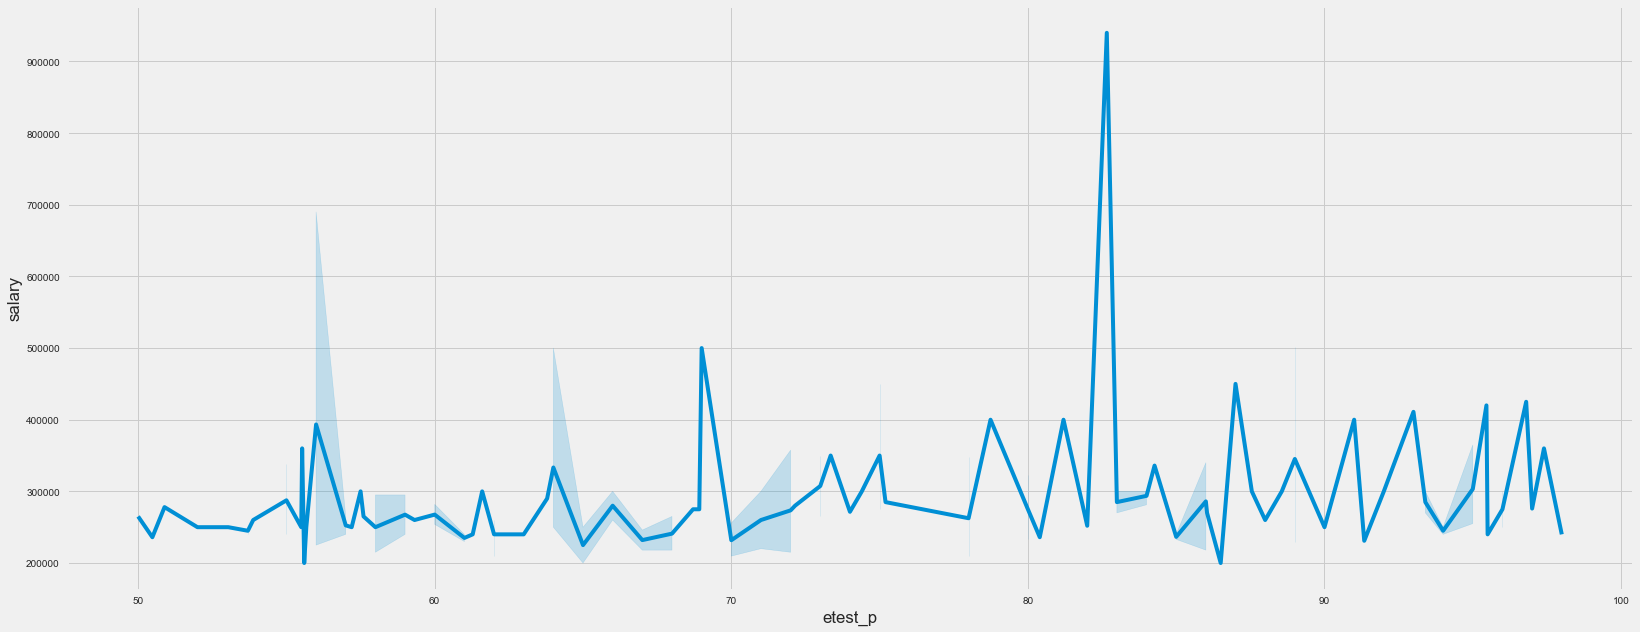

In [11]:
mp.figure(figsize=(25, 10))
_ = sns.lineplot('etest_p', 'salary', data=rec)

etest_p doesn't affect the status of placement.

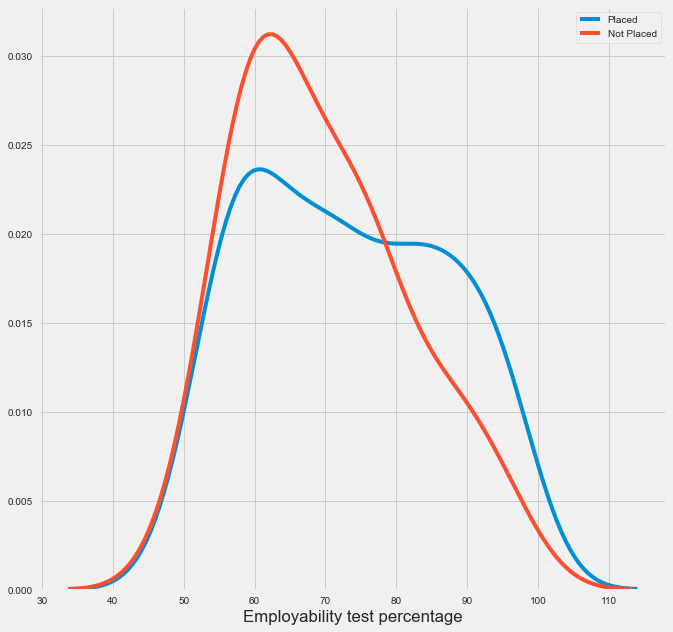

In [13]:
mp.figure(figsize=(10, 10))
_ = sns.kdeplot(rec.etest_p[ rec.status=="Placed"])
_ = sns.kdeplot(rec.etest_p[ rec.status=="Not Placed"])
_ = mp.legend(["Placed", "Not Placed"])
_ = mp.xlabel("Employability test percentage")
# plt.show()

Both the placed and not placed studetns have almost the same employability test percentage.

Thus it can be stated that this does not affect the placement.

## Working with features specialisation [MBA Specialisation] and mba_p [Prcentage in MBA]

In [14]:
rec.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4     No     96.8        Mkt&Fin  55.50      Placed  425000.0

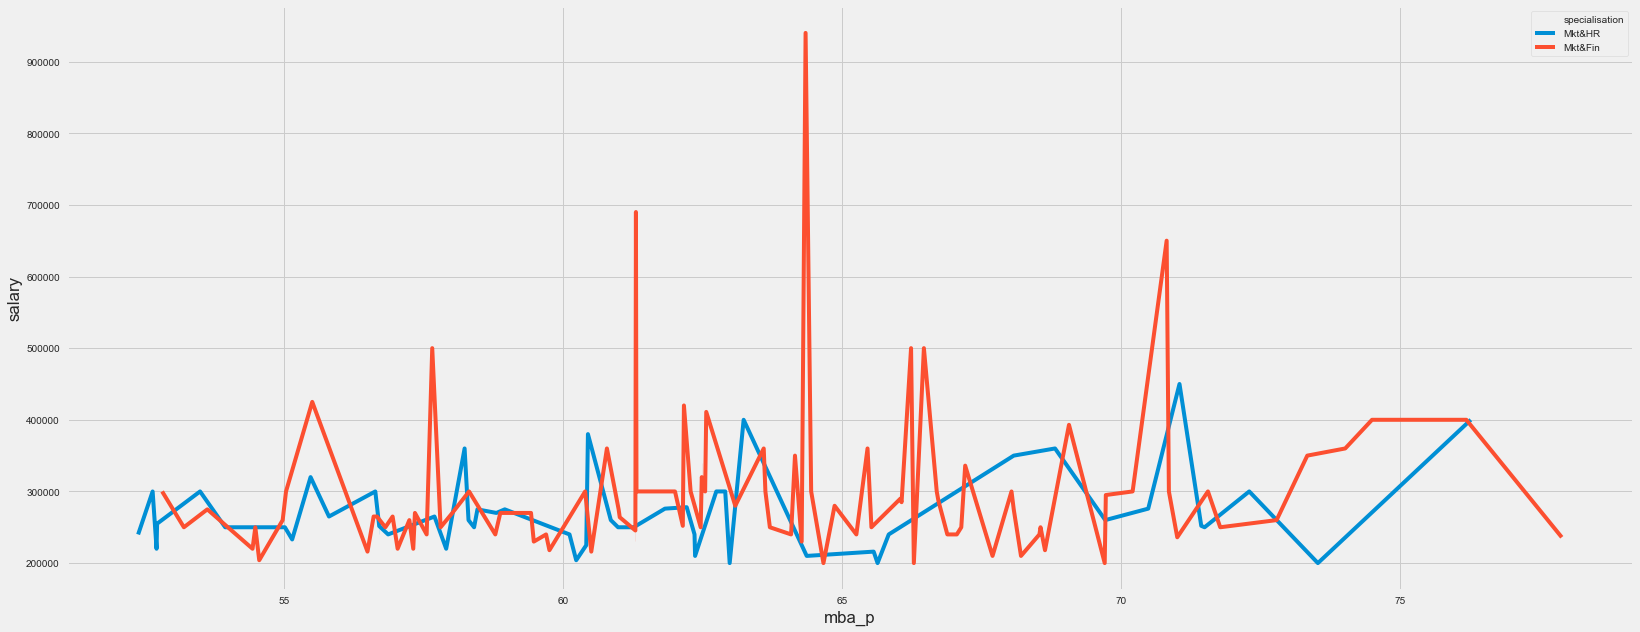

In [15]:
mp.figure(figsize=(25, 10))
_ = sns.lineplot('mba_p', 'salary', hue='specialisation', data=rec)

Marketing and Finance seems to get better salary than Marketing and HR.

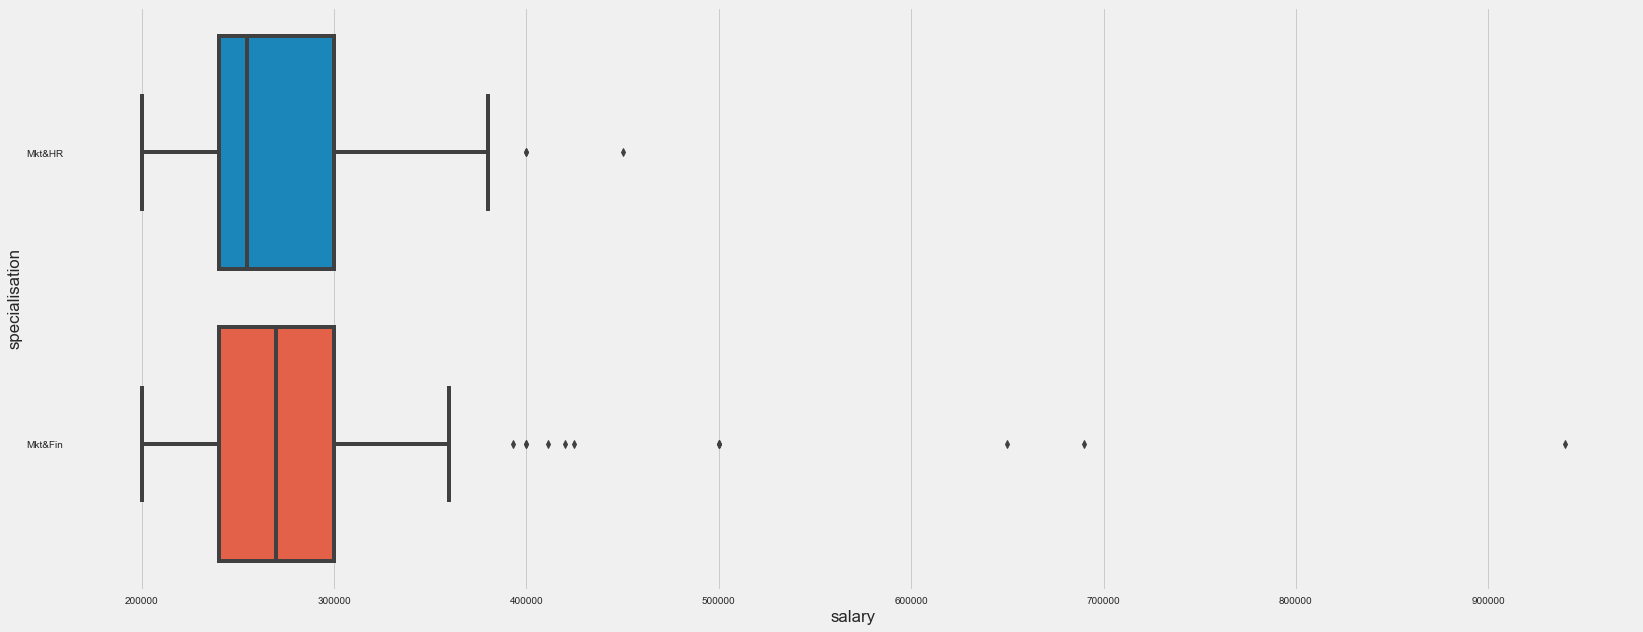

In [17]:
mp.figure(figsize=(25, 10))
_ = sns.boxplot('salary', 'specialisation', data=rec)

There are outlier on both the sides but Mkt&Fin has many more outliers than Mkt&Hr.

Mkt&Fin was offered the highest salary and they got higher salaries as compared to Mkt&HR on avg.

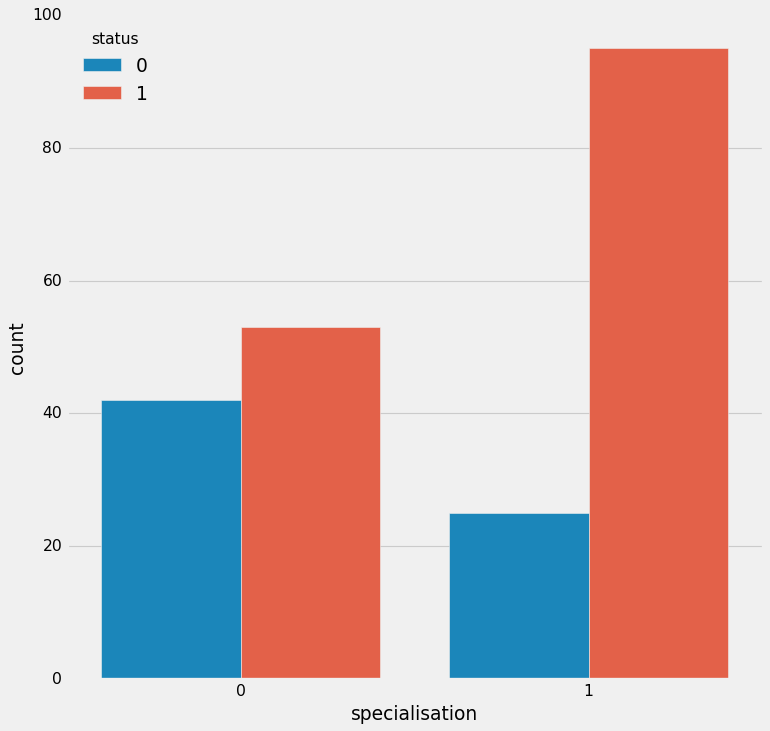

In [49]:
mp.figure(figsize=(10, 10))
_ = sns.countplot('specialisation', hue='status', data=rec)

More students from the Mkt&Fin got placed as compared to Mkt&Hr students.

Less number of students form Mkt&Fin were not placed as compared to the students of Mkt&Hr.

The specialisation affects the status and the salary.

## Final Insights

In [3]:
rec.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4     No     96.8        Mkt&Fin  55.50      Placed  425000.0

The features we would consider for Linear Regression:-
* Gender
* ssc_p
* hsc_p
* hsc_s
* degree_p
* degree_t
* workex
* etest_p
* specialisation
* mba_p

* 67 missing values in Salary column.
* Also the Salary column has some outliers.
* Range of the data is different. Needs to be scaled.
<br>
* Male → 139 & Female → 76
* The placements seems to be biased in favour of Male gender.
* Men seem to be offered higher salary placements. They create outliers in the data.
* They are getting hihger CTC jobs than Females on average.
<br>
* Students from both the boards seem to get almost same amount of placements.
* There are outliers in both the boards. But students from Central board students get higher salary.
* Conclusion ssc_b [Secondary Education Board] is not affecting the salary and status.
<br>
* The plot ignores any Nan values and since anyone who didn't get placed will have a Nan value in the salary column this plot will not take them into the process of graph formation.
* And thus there is only one line in the plot which refers to the students who got placed.
<br>
* There seems to be no correlation between the data of salary and ssc percentage. Thus ssc percentage is not affecting the salary.
* Board is not affecting the salary as mentioned earlier.
<br>
* The Others value in the board has more placements as compared to the Central board.
* But that may consists of multiple boards and thus we can conclude that the HSC Board does not affect the placement.
<br>
* Same insights can be gained form this plot as well.
* The Central board students get higher salary but there are outliers on both the sides.
<br>
* The same conclusion can be drawn from this chart.
* The hsc_p doesnt affect the salary.
<br>
* The number of candidates from Arts spl are very low
<br>
* The students of Arts get less salary as compared to students of other specializations of Commerce and Science on an average.
* There are outliers on both the Science and Commerce parts and the Commerce students seem to get higher salary.
<br>
* There are more students of Comm&Mgmt than any other degree course.
* They have received more placements than any other degree course.
* The count Others is very low.
* It can be concluded that the degree course is affecting the status of placement.
<br>
* There are outliers on both the Sci&Tech and Comm&Mgmt but Comm&Mgmt received higher salary offers.
* Students of Others course receive lower salary on average as compared to other courses.
<br>
* The workex has an affect on the status.
* Most of the students having no workex did not get placed.
* Though the students who got placed had more number of students with no workex.
<br>
* There are outlier on both the sides.
* It is clear that students with workex were offered more salary as compared to the ones without workex.
<br>
* etest_p doesn't affect the status of placement.
<br>
* Both the placed and not placed studetns have almost the same employability test percentage.
* Thus it can be stated that this does not affect the placement.
<br>
* Marketing and Finance seems to get better salary than Marketing and HR.
<br>
* There are outlier on both the sides but Mkt&Fin has many more outliers than Mkt&Hr.
* Mkt&Fin was offered the highest salary and they got higher salaries as compared to Mkt&HR on avg.
<br>
* More students from the Mkt&Fin got placed as compared to Mkt&Hr students.
* Less number of students form Mkt&Fin were not placed as compared to the students of Mkt&Hr.
* The specialisation affects the status and the salary.

In [64]:
rec_modified = rec.drop(['ssc_b', 'hsc_b'], axis='columns')
rec_modified.head()

gender  ssc_p  hsc_p     hsc_s  degree_p   degree_t workex  etest_p  \
0      M  67.00  91.00  Commerce     58.00   Sci&Tech     No     55.0   
1      M  79.33  78.33   Science     77.48   Sci&Tech    Yes     86.5   
2      M  65.00  68.00      Arts     64.00  Comm&Mgmt     No     75.0   
3      M  56.00  52.00   Science     52.00   Sci&Tech     No     66.0   
4      M  85.80  73.60  Commerce     73.30  Comm&Mgmt     No     96.8   

  specialisation  mba_p      status    salary  
0         Mkt&HR  58.80      Placed  270000.0  
1        Mkt&Fin  66.28      Placed  200000.0  
2        Mkt&Fin  57.80      Placed  250000.0  
3         Mkt&HR  59.43  Not Placed       NaN  
4        Mkt&Fin  55.50      Placed  425000.0

In [65]:
rec_modified["gender"] = rec_modified.gender.map({"M":0,"F":1})
rec_modified["hsc_s"] = rec_modified.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
rec_modified["degree_t"] = rec_modified.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
rec_modified["workex"] = rec_modified.workex.map({"No":0, "Yes":1})
rec_modified["status"] = rec_modified.status.map({"Not Placed":0, "Placed":1})
rec_modified["specialisation"] = rec_modified.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

### Using Decesion Tree Classifier for classifying Placement Status

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

**Since DT doesn't require the data to be scaled or encoded, those processes here are unnecessary.**

The Salary feature here is not useful for the purpose of classification since salary is only given to the sutdent who got placed.

In [66]:
x = rec_modified.drop(['salary', 'status'], axis='columns')
y = rec_modified['status']
x.head()

gender  ssc_p  hsc_p  hsc_s  degree_p  degree_t  workex  etest_p  \
0       0  67.00  91.00      0     58.00         1       0     55.0   
1       0  79.33  78.33      1     77.48         1       1     86.5   
2       0  65.00  68.00      2     64.00         0       0     75.0   
3       0  56.00  52.00      1     52.00         1       0     66.0   
4       0  85.80  73.60      0     73.30         0       0     96.8   

   specialisation  mba_p  
0               0  58.80  
1               1  66.28  
2               1  57.80  
3               0  59.43  
4               1  55.50

In [67]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int64

In [88]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.25)

In [89]:
dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(x_train, y_train)
y_pred = dt_clf.predict(x_test)

In [90]:
accuracy_score(y_pred, y_test)

0.8148148148148148

[Micro, Macro and Weighted Average in a multi class setting](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin)

In [91]:
from pprint import pprint
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.89      0.84      0.86        37

    accuracy                           0.81        54
   macro avg       0.78      0.80      0.79        54
weighted avg       0.82      0.81      0.82        54



In [92]:
rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)

In [93]:
accuracy_score(y_pred_rf, y_test)

0.9259259259259259

In [94]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       0.90      1.00      0.95        37

    accuracy                           0.93        54
   macro avg       0.95      0.88      0.91        54
weighted avg       0.93      0.93      0.92        54



In [95]:
rows = x.columns
imp = pd.DataFrame(np.zeros(6*len(rows)).reshape(2*len(rows), 3))
imp.columns = ['Model', 'Feature', 'Importance']

In [96]:
for i in range(len(rows)):
    imp.iloc[i, :] = ['DT', rows[i], dt_clf.feature_importances_[i]*100]
    imp.iloc[i+len(rows), :] = ['RF', rows[i], rf_clf.feature_importances_[i]*100]
imp

Model         Feature  Importance
0     DT          gender    0.000000
1     DT           ssc_p   35.077633
2     DT           hsc_p   25.070956
3     DT           hsc_s    0.000000
4     DT        degree_p   17.466951
5     DT        degree_t    5.098860
6     DT          workex    3.468147
7     DT         etest_p    3.985512
8     DT  specialisation    4.739124
9     DT           mba_p    5.092817
10    RF          gender    2.296123
11    RF           ssc_p   29.400698
12    RF           hsc_p   18.697157
13    RF           hsc_s    1.741187
14    RF        degree_p   19.449703
15    RF        degree_t    2.599130
16    RF          workex    3.891751
17    RF         etest_p    7.316249
18    RF  specialisation    2.693402
19    RF           mba_p   11.914600

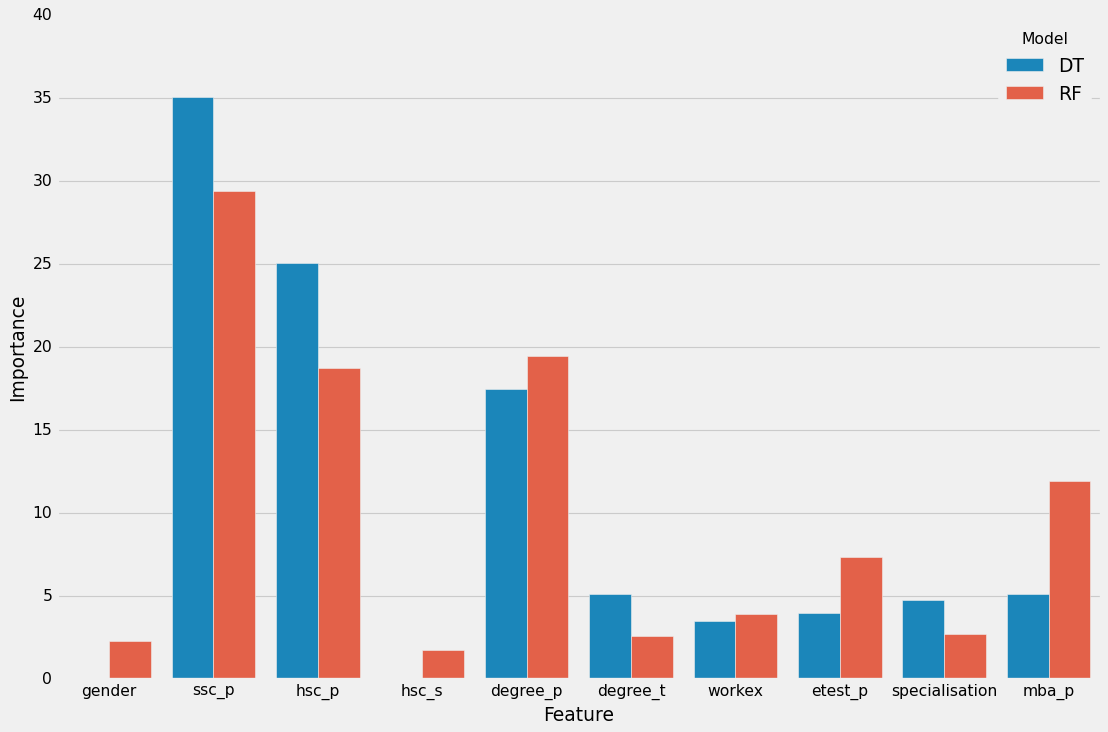

In [97]:
mp.figure(figsize=(15, 10))
_ = sns.barplot('Feature', 'Importance', hue='Model', data=imp)

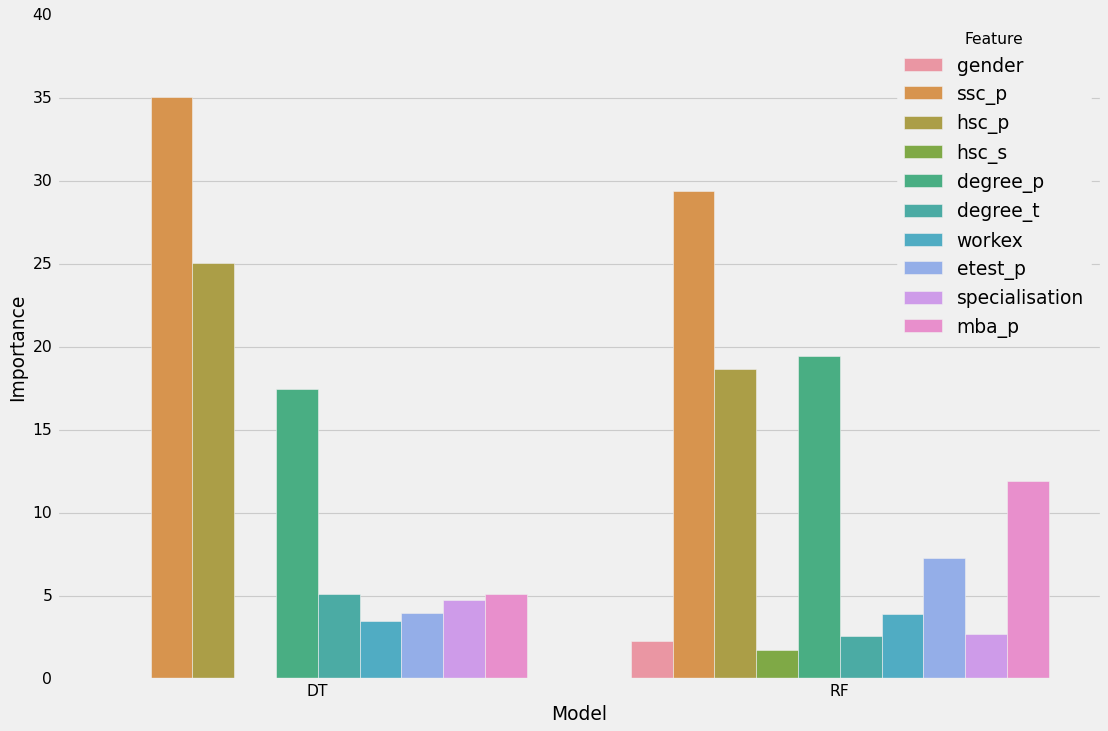

In [101]:
mp.figure(figsize=(15, 10))
_ = sns.barplot('Model', 'Importance', hue='Feature', data=imp)

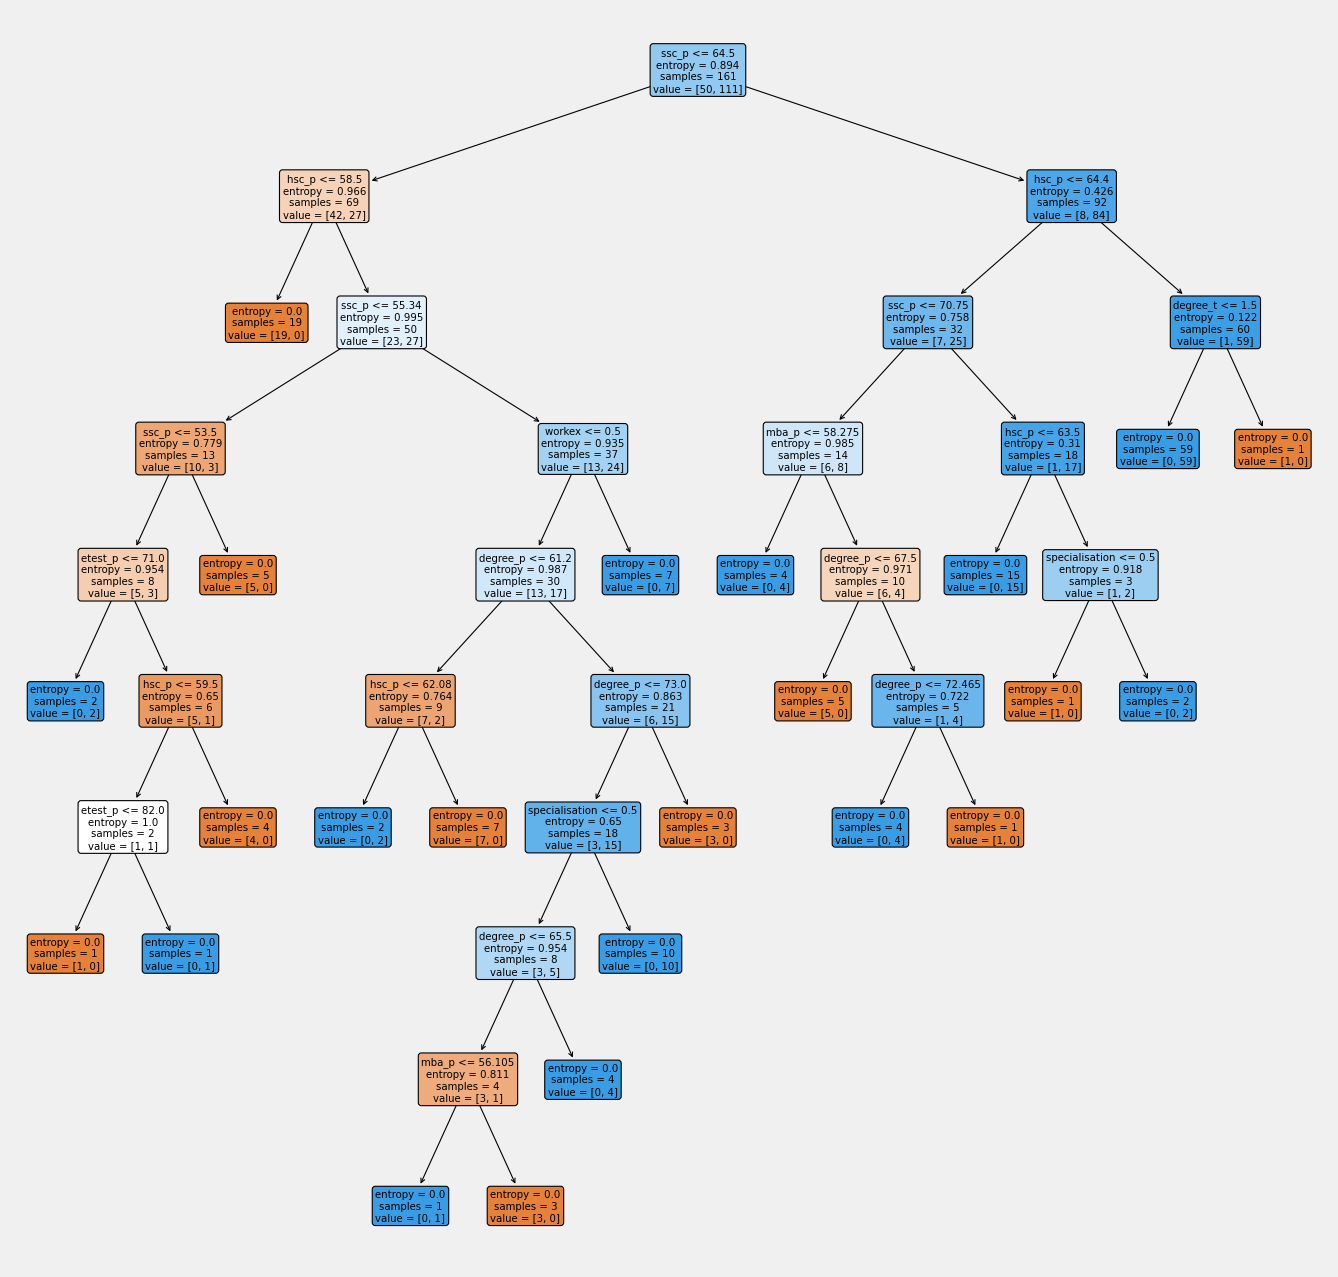

In [100]:
from sklearn import tree
mp.figure(figsize=(19, 19))
mp.style.use('classic')
_ = tree.plot_tree(dt_clf, filled=True, rounded=True, feature_names=rec_modified.columns)
mp.style.use('fivethirtyeight')